In [ ]:
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
plt.style.use("bmh")
from keras.metrics.metrics import mean_squared_error

In [2]:
df = pd.read_csv('myvalues.csv')

In [3]:
df.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind
0,Tropical Cyclone Dingani,2023-02-09T06:00:00Z,Point,89.1,-16.9,40.0
1,Tropical Cyclone Dingani,2023-02-09T12:00:00Z,Point,87.7,-16.6,40.0
2,Tropical Cyclone Dingani,2023-02-09T18:00:00Z,Point,86.3,-16.3,40.0
3,Tropical Cyclone Dingani,2023-02-10T00:00:00Z,Point,85.0,-16.2,45.0
4,Tropical Cyclone Dingani,2023-02-10T06:00:00Z,Point,83.6,-16.3,45.0


In [4]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [5]:
df['Date'] = df.DateTime.dt.date
df['Time'] = df.DateTime.dt.time

In [6]:
df["Date"] = df["Date"].astype("object")
for i, date_str in enumerate(df["Date"].unique()):
    df.loc[df["Date"]==date_str, "Date"] = f"{str(date_str)[0:4]}-{str(date_str)[4:6]}-{str(date_str)[6:]}"

In [7]:
print(f"Dataset contains data of {df['CycloneName'].unique().shape[0]} individual storms from {df['DateTime'].dt.year.min()} to {df['DateTime'].dt.year.max()}.")

Dataset contains data of 1 individual storms from 2023 to 2023.


In [8]:
def coordinate_mapping(x):
    coord = float(x[:-1])
    if x[-1]=="W":
        coord *= -1
    if x[-1]=="S":
        coord *= -1
    return coord

In [9]:
print("Min. Long.:", df.Longitude.min(), "Max. Long.:", df.Longitude.max(), "Min. Lat.:", df.Latitude.min(), "Max. Lat.:", df.Latitude.max())

Min. Long.: -31.0 Max. Long.: -15.5 Min. Lat.: 67.4 Max. Lat.: 89.1


In [10]:
df.loc[df.Longitude<-180, "Longitude"] = df.Longitude+360

In [11]:
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude,df.Latitude), crs={'init' : 'epsg:4326'})

In [12]:
gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [14]:
name = gdf["CycloneName"]

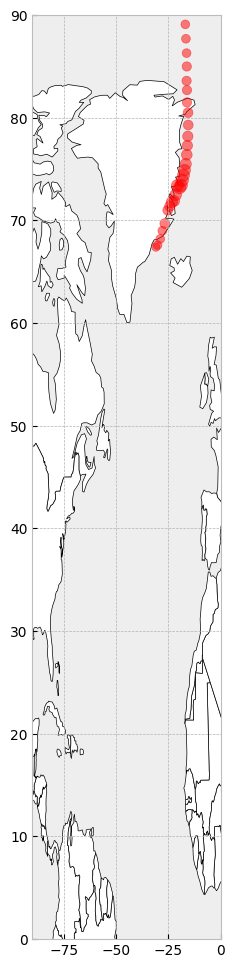

In [15]:
ax = world.plot(color="white", edgecolor="black", figsize=(25,12))
_ = gdf[gdf["CycloneName"]==name].plot(ax=ax, c="r", markersize="Maximum Wind", alpha=0.5)
_ = plt.xlim(-90, 0)
_ = plt.ylim(0, 90)

In [16]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry
0,Tropical Cyclone Dingani,2023-02-09 06:00:00+00:00,Point,89.1,-16.9,40.0,2023--0-2-09,06:00:00,POINT (-16.90000 89.10000)
1,Tropical Cyclone Dingani,2023-02-09 12:00:00+00:00,Point,87.7,-16.6,40.0,2023--0-2-09,12:00:00,POINT (-16.60000 87.70000)
2,Tropical Cyclone Dingani,2023-02-09 18:00:00+00:00,Point,86.3,-16.3,40.0,2023--0-2-09,18:00:00,POINT (-16.30000 86.30000)
3,Tropical Cyclone Dingani,2023-02-10 00:00:00+00:00,Point,85.0,-16.2,45.0,2023--0-2-10,00:00:00,POINT (-16.20000 85.00000)
4,Tropical Cyclone Dingani,2023-02-10 06:00:00+00:00,Point,83.6,-16.3,45.0,2023--0-2-10,06:00:00,POINT (-16.30000 83.60000)


In [17]:
lat_min = gdf.Latitude.min()
long_min = gdf.Longitude.min()
gdf["x"] = gdf.Latitude-lat_min
gdf["x"] = gdf["x"]/gdf["x"].max()
gdf["y"] = gdf.Longitude-long_min
gdf["y"] = gdf["y"]/gdf["y"].max()

In [18]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry,x,y
0,Tropical Cyclone Dingani,2023-02-09 06:00:00+00:00,Point,89.1,-16.9,40.0,2023--0-2-09,06:00:00,POINT (-16.90000 89.10000),1.000000,0.909677
1,Tropical Cyclone Dingani,2023-02-09 12:00:00+00:00,Point,87.7,-16.6,40.0,2023--0-2-09,12:00:00,POINT (-16.60000 87.70000),0.935484,0.929032
2,Tropical Cyclone Dingani,2023-02-09 18:00:00+00:00,Point,86.3,-16.3,40.0,2023--0-2-09,18:00:00,POINT (-16.30000 86.30000),0.870968,0.948387
3,Tropical Cyclone Dingani,2023-02-10 00:00:00+00:00,Point,85.0,-16.2,45.0,2023--0-2-10,00:00:00,POINT (-16.20000 85.00000),0.811060,0.954839
4,Tropical Cyclone Dingani,2023-02-10 06:00:00+00:00,Point,83.6,-16.3,45.0,2023--0-2-10,06:00:00,POINT (-16.30000 83.60000),0.746544,0.948387


In [19]:
gdf["relative_time"] = ((gdf.DateTime.dt.dayofyear+(gdf.DateTime.dt.hour/24.)+(gdf.DateTime.dt.minute/60.*24))/366.)

In [20]:
gdf["month"] = gdf.DateTime.dt.month
gdf["hour"] = gdf.DateTime.dt.hour

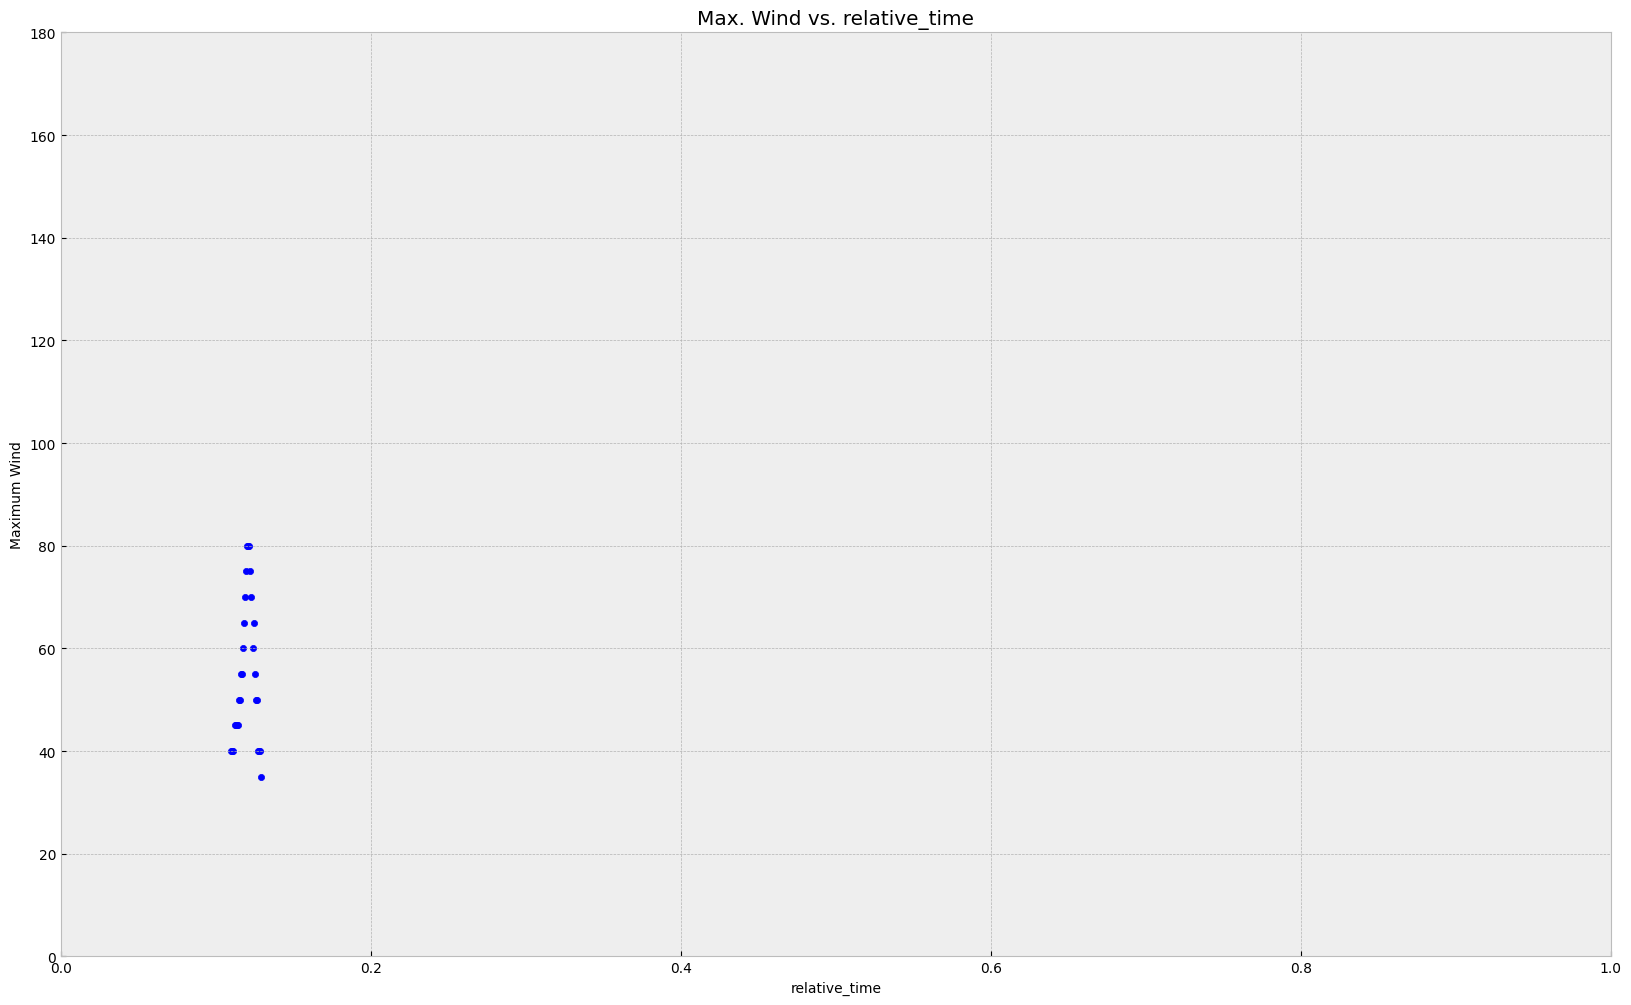

In [21]:
_ = gdf.plot(x="relative_time", y="Maximum Wind", kind="scatter", figsize=(20,12), title="Max. Wind vs. relative_time")
_ = plt.ylim(0,180)
_ = plt.xlim(0,1)

In [22]:
df.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry
0,Tropical Cyclone Dingani,2023-02-09 06:00:00+00:00,Point,89.1,-16.9,40.0,2023--0-2-09,06:00:00,POINT (-16.90000 89.10000)
1,Tropical Cyclone Dingani,2023-02-09 12:00:00+00:00,Point,87.7,-16.6,40.0,2023--0-2-09,12:00:00,POINT (-16.60000 87.70000)
2,Tropical Cyclone Dingani,2023-02-09 18:00:00+00:00,Point,86.3,-16.3,40.0,2023--0-2-09,18:00:00,POINT (-16.30000 86.30000)
3,Tropical Cyclone Dingani,2023-02-10 00:00:00+00:00,Point,85.0,-16.2,45.0,2023--0-2-10,00:00:00,POINT (-16.20000 85.00000)
4,Tropical Cyclone Dingani,2023-02-10 06:00:00+00:00,Point,83.6,-16.3,45.0,2023--0-2-10,06:00:00,POINT (-16.30000 83.60000)


In [24]:
gdf["vec_x"] = np.nan
gdf["vec_y"] = np.nan
vecs = {"x": [], "y": [], "id": []}
for storm_id in gdf["CycloneName"].unique():
    last_x = 0
    last_y = 0
    for i, row in gdf[gdf["CycloneName"]==storm_id].iterrows():
        if last_x==0:
            last_x = row.x
            last_y = row.y
        else:
            vec_x = row.x-last_x
            vec_y = row.y-last_y
            vecs["x"].append(vec_x)
            vecs["y"].append(vec_y)
            vecs["id"].append(i)
            last_x = row.x
            last_y = row.y
gdf.loc[vecs["id"], "vec_x"] = vecs["x"]
gdf.loc[vecs["id"], "vec_y"] = vecs["y"]

In [25]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry,x,y,relative_time,month,hour,vec_x,vec_y
0,Tropical Cyclone Dingani,2023-02-09 06:00:00+00:00,Point,89.1,-16.9,40.0,2023--0-2-09,06:00:00,POINT (-16.90000 89.10000),1.000000,0.909677,0.109973,2,6,NaN,NaN
1,Tropical Cyclone Dingani,2023-02-09 12:00:00+00:00,Point,87.7,-16.6,40.0,2023--0-2-09,12:00:00,POINT (-16.60000 87.70000),0.935484,0.929032,0.110656,2,12,-0.064516,0.019355
2,Tropical Cyclone Dingani,2023-02-09 18:00:00+00:00,Point,86.3,-16.3,40.0,2023--0-2-09,18:00:00,POINT (-16.30000 86.30000),0.870968,0.948387,0.111339,2,18,-0.064516,0.019355
3,Tropical Cyclone Dingani,2023-02-10 00:00:00+00:00,Point,85.0,-16.2,45.0,2023--0-2-10,00:00:00,POINT (-16.20000 85.00000),0.811060,0.954839,0.112022,2,0,-0.059908,0.006452
4,Tropical Cyclone Dingani,2023-02-10 06:00:00+00:00,Point,83.6,-16.3,45.0,2023--0-2-10,06:00:00,POINT (-16.30000 83.60000),0.746544,0.948387,0.112705,2,6,-0.064516,-0.006452


In [26]:
gdf["vec_len"] = np.sqrt((gdf["vec_x"]**2)+(gdf["vec_y"]**2))

In [27]:
def calculate_direction(vec_x, vec_y):
    def vec_angle(a, b):
        return np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
    ref_vec = np.array([vec_x, vec_y])
    N_vec = np.array([0,1])
    S_vec = np.array([0,-1])
    E_vec = np.array([1,0])
    W_vec = np.array([-1,0])
    N_angle = vec_angle(ref_vec, N_vec)
    E_angle = vec_angle(ref_vec, E_vec)
    W_angle = vec_angle(ref_vec, W_vec)
    return_angle = N_angle
    if W_angle<E_angle:
        return_angle = 2*np.pi-return_angle
    return return_angle

In [28]:
gdf["vec_direction"] = gdf.apply(lambda x: calculate_direction(x.vec_x, x.vec_y), axis=1)

In [29]:
gdf["tdelta"] = np.nan
tdeltas = {"t": [], "id": []}
for storm_id in gdf["CycloneName"].unique():
    last_time = 0
    for i, row in gdf[gdf["CycloneName"]==storm_id].iterrows():
        if last_time==0:
            last_time = row.DateTime
        else:
            tdeltas["t"].append((row.DateTime-last_time).seconds)
            tdeltas["id"].append(i)
            last_time = row.DateTime
gdf.loc[tdeltas["id"], "tdelta"] = tdeltas["t"]

In [30]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry,x,y,relative_time,month,hour,vec_x,vec_y,vec_len,vec_direction,tdelta
0,Tropical Cyclone Dingani,2023-02-09 06:00:00+00:00,Point,89.1,-16.9,40.0,2023--0-2-09,06:00:00,POINT (-16.90000 89.10000),1.000000,0.909677,0.109973,2,6,NaN,NaN,NaN,NaN,NaN
1,Tropical Cyclone Dingani,2023-02-09 12:00:00+00:00,Point,87.7,-16.6,40.0,2023--0-2-09,12:00:00,POINT (-16.60000 87.70000),0.935484,0.929032,0.110656,2,12,-0.064516,0.019355,0.067357,5.003846,21600.0
2,Tropical Cyclone Dingani,2023-02-09 18:00:00+00:00,Point,86.3,-16.3,40.0,2023--0-2-09,18:00:00,POINT (-16.30000 86.30000),0.870968,0.948387,0.111339,2,18,-0.064516,0.019355,0.067357,5.003846,21600.0
3,Tropical Cyclone Dingani,2023-02-10 00:00:00+00:00,Point,85.0,-16.2,45.0,2023--0-2-10,00:00:00,POINT (-16.20000 85.00000),0.811060,0.954839,0.112022,2,0,-0.059908,0.006452,0.060254,4.819668,21600.0
4,Tropical Cyclone Dingani,2023-02-10 06:00:00+00:00,Point,83.6,-16.3,45.0,2023--0-2-10,06:00:00,POINT (-16.30000 83.60000),0.746544,0.948387,0.112705,2,6,-0.064516,-0.006452,0.064838,4.612720,21600.0


In [31]:
gdf = gdf[gdf["tdelta"]==21600]
gdf.shape

(28, 19)

In [32]:
gdf["prev_len"] = np.nan
gdf["prev_direction"] = np.nan
prevs = {"len": [], "direction": [], "id": []}
for storm_id in gdf["CycloneName"].unique():
    last_len = False
    last_direction = False
    for i, row in gdf[gdf["CycloneName"]==storm_id].iterrows():
        if last_len==False:
            last_len = row.vec_len
            last_direction = row.vec_direction
        else:
            prevs["len"].append(last_len)
            prevs["direction"].append(last_direction)
            prevs["id"].append(i)
            last_len = row.vec_len
            last_direction = row.vec_direction
gdf.loc[prevs["id"], "prev_len"] = prevs["len"]
gdf.loc[prevs["id"], "prev_direction"] = prevs["direction"]

In [34]:
gdf.dropna(how="any", inplace=True)
gdf.shape

(27, 21)

Prediction

In [35]:
gdf_prediction_direction = gdf[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vec_direction"]]
gdf_prediction_length = gdf[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction","vec_len"]]
X_direction = gdf_prediction_direction.values[:,:-1]
y_direction = gdf_prediction_direction.values[:,-1]
X_length = gdf_prediction_length.values[:,:-1]
y_length = gdf_prediction_length.values[:,-1]

In [36]:
gdf.head()

,CycloneName,DateTime,Type,Latitude,Longitude,Maximum Wind,Date,Time,geometry,x,...,relative_time,month,hour,vec_x,vec_y,vec_len,vec_direction,tdelta,prev_len,prev_direction
2,Tropical Cyclone Dingani,2023-02-09 18:00:00+00:00,Point,86.3,-16.3,40.0,2023--0-2-09,18:00:00,POINT (-16.30000 86.30000),0.870968,...,0.111339,2,18,-0.064516,0.019355,0.067357,5.003846,21600.0,0.067357,5.003846
3,Tropical Cyclone Dingani,2023-02-10 00:00:00+00:00,Point,85.0,-16.2,45.0,2023--0-2-10,00:00:00,POINT (-16.20000 85.00000),0.811060,...,0.112022,2,0,-0.059908,0.006452,0.060254,4.819668,21600.0,0.067357,5.003846
4,Tropical Cyclone Dingani,2023-02-10 06:00:00+00:00,Point,83.6,-16.3,45.0,2023--0-2-10,06:00:00,POINT (-16.30000 83.60000),0.746544,...,0.112705,2,6,-0.064516,-0.006452,0.064838,4.612720,21600.0,0.060254,4.819668
5,Tropical Cyclone Dingani,2023-02-10 12:00:00+00:00,Point,82.7,-16.1,45.0,2023--0-2-10,12:00:00,POINT (-16.10000 82.70000),0.705069,...,0.113388,2,12,-0.041475,0.012903,0.043435,5.014008,21600.0,0.064838,4.612720
6,Tropical Cyclone Dingani,2023-02-10 18:00:00+00:00,Point,81.5,-16.1,45.0,2023--0-2-10,18:00:00,POINT (-16.10000 81.50000),0.649770,...,0.114071,2,18,-0.055300,0.000000,0.055300,4.712389,21600.0,0.043435,5.014008


In [37]:
from sklearn.model_selection import train_test_split
X_direction_train, X_direction_test, y_direction_train, y_direction_test = train_test_split(X_direction, y_direction, test_size=0.2, random_state=42)
X_length_train, X_length_test, y_length_train, y_length_test = train_test_split(X_length, y_length, test_size=0.2, random_state=42)

In [38]:
print(X_direction.shape)
print(y_direction.shape)
print(X_length.shape)
print(y_length.shape)

(27, 7)
(27,)
(27, 7)
(27,)


LSTM


In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
import math, time
from geopy.distance import great_circle as vc
import math as Math
from keras.models import model_from_json

In [40]:
# Define the number of inputs, hidden units, and outputs
n_inputs = X_direction_train.shape[1]
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_outputs = 1

# Create the LSTM model
model = Sequential()
model.add(LSTM(n_hidden1, input_shape=(n_inputs, 1), return_sequences=True))
model.add(LSTM(n_hidden2, return_sequences=True))
model.add(LSTM(n_hidden3))
model.add(Dense(n_outputs))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_direction_lstm = model.fit(X_direction_train, y_direction_train, epochs=100, batch_size=64)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 15.1530
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 14.0277
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 12.8827
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 11.7095
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 10.5023
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2641
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 8.0076
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 6.7593
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 5.5588
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 4.4499
Epoch 11/100
1/1 [==============================] - 0s 22ms/step - loss: 3.4710
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 2.6457
Epoch 13/100
1/1 [============================

In [41]:
model1 = Sequential()
model1.add(LSTM(n_hidden1, input_shape=(n_inputs, 1), return_sequences=True))
model1.add(LSTM(n_hidden2, return_sequences=True))
model1.add(LSTM(n_hidden3))
model1.add(Dense(n_outputs))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_length_lstm = model1.fit(X_length_train, y_length_train, epochs=100, batch_size=64)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.0096
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0062
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0034
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 6.5195e-04
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 7.6946e-04
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0020
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0025
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0018
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 8.7662e-04
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 3.6652e-04
Epoch 12/100
1/1 [==============================] - 0s 24ms/step - loss: 5.1706e-04
Epoch 13/100
1/1 [=============

In [42]:
Y_test_predicted_lstm_direction = model.predict(X_direction_test)
# print(Y_test_predicted_lstm_direction)
Y_test_predicted_lstm_length = model1.predict(X_length_test)
# print(Y_test_predicted_lstm_length)
predicted = np.dstack((Y_test_predicted_lstm_direction,Y_test_predicted_lstm_length))
print(predicted)

1/1 [==============================] - 1s 1s/step
[[[3.97394    0.0582802 ]]

 [[3.9706476  0.06256773]]

 [[3.9727607  0.06619135]]

 [[3.9718     0.07032012]]

 [[3.9754186  0.06249385]]

 [[3.972877   0.05559191]]]


In [ ]:
errorlstm = mean_squared_error(y_direction_test,Y_test_predicted_lstm_direction[:,0])
print(errorlstm)
lstm = [Y_test_predicted_lstm_direction,Y_test_predicted_lstm_length,errorlstm]

0.2897304722261279


In [52]:
mean_squared_error(y_length_test,Y_test_predicted_lstm_length[:,0])

0.00019169593

MLP

In [44]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=100,learning_rate_init=0.1,max_iter=300,verbose=True)
mlp1 = MLPRegressor(hidden_layer_sizes=100,learning_rate_init=0.1,max_iter=300,verbose=True)

In [45]:
model_direction_mlp = mlp.fit(X_direction_train, y_direction_train)

Iteration 1, loss = 68.22362985
Iteration 2, loss = 1340.36130683
Iteration 3, loss = 128.42695039
Iteration 4, loss = 80.59389031
Iteration 5, loss = 33.38095665
Iteration 6, loss = 38.34487967
Iteration 7, loss = 4.72371741
Iteration 8, loss = 11.68792926
Iteration 9, loss = 20.58089420
Iteration 10, loss = 5.46572023
Iteration 11, loss = 3.55406458
Iteration 12, loss = 14.16693846
Iteration 13, loss = 3.97984859
Iteration 14, loss = 1.70733436
Iteration 15, loss = 8.11575986
Iteration 16, loss = 7.21149660
Iteration 17, loss = 1.43176899
Iteration 18, loss = 1.69634657
Iteration 19, loss = 5.86633485
Iteration 20, loss = 3.49492816
Iteration 21, loss = 0.40732407
Iteration 22, loss = 2.05193909
Iteration 23, loss = 3.78358357
Iteration 24, loss = 2.45490404
Iteration 25, loss = 0.48873707
Iteration 26, loss = 1.05119433
Iteration 27, loss = 2.50211716
Iteration 28, loss = 1.69338406
Iteration 29, loss = 0.38269407
Iteration 30, loss = 0.75739874
Iteration 31, loss = 1.60665957
Itera

In [46]:
model_length_mlp = mlp1.fit(X_length_train, y_length_train)

Iteration 1, loss = 2.75717906
Iteration 2, loss = 3223.43430382
Iteration 3, loss = 214.65717589
Iteration 4, loss = 361.16929440
Iteration 5, loss = 266.51228858
Iteration 6, loss = 9.89367815
Iteration 7, loss = 191.05326544
Iteration 8, loss = 122.64799660
Iteration 9, loss = 15.48733146
Iteration 10, loss = 4.14937219
Iteration 11, loss = 28.89032257
Iteration 12, loss = 43.53817121
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [47]:
Y_test_predicted_mlp_direction = mlp.predict(X_direction_test)
Y_test_predicted_mlp_length = mlp1.predict(X_length_test)

In [51]:
errormlp = mean_squared_error(y_direction_test,Y_test_predicted_mlp_direction)
print(errormlp)
svr = [model_direction_mlp,model_length_mlp,errormlp]

0.022159384528679122


In [54]:
mean_squared_error(y_length_test,Y_test_predicted_mlp_length)

87.97950679418331

GradientBoostingRegressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [57]:
model_direction = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0).fit(X_direction_train, y_direction_train)
errorgrad = mean_squared_error(y_direction_test, model_direction.predict(X_direction_test))
print(errorgrad)

0.1234760790813918


In [58]:
model_length = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0).fit(X_length_train, y_length_train)
mean_squared_error(y_length_test, model_length.predict(X_length_test))
grad = [model_direction,model_length,errorgrad]
print(grad[0],grad[1])

GradientBoostingRegressor(max_depth=5, random_state=0) GradientBoostingRegressor(max_depth=5, random_state=0)


In [59]:
print(grad[1])

GradientBoostingRegressor(max_depth=5, random_state=0)


SVR

In [60]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=1.0,epsilon=0.1,degree=3)
svr1 = SVR(kernel='rbf',C=1.0,epsilon=0.1,degree=3)

In [61]:
model_direction_svr = svr.fit(X_direction_train, y_direction_train)
model_length_svr = svr1.fit(X_length_train, y_length_train)

In [62]:
Y_test_direction_predicted_svr = model_direction_svr.predict(X_direction_test)
Y_test_length_predicted_svr = model_length_svr.predict(X_length_test)

In [63]:
errorsvr = mean_squared_error(y_direction_test,Y_test_direction_predicted_svr)
print(errorsvr)
svr = [model_direction_svr,model_length_svr,errorsvr]

0.39575233831338785


In [64]:
mean_squared_error(y_length_test,Y_test_length_predicted_svr)

0.0006096276606870387

LinearRegression

In [65]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
lin_reg1 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [ ]:
model_direction_lr = lin_reg.fit(X_direction_train, y_direction_train)
model_length_lr = lin_reg1.fit(X_length_test,y_length_test)

In [ ]:
Y_test_direction_predicted_lr = model_direction_lr.predict(X_direction_test)
Y_test_length_predicted_lr = model_length_lr.predict(X_length_test)
print(Y_test_direction_predicted_lr,Y_test_length_predicted_lr)

[4.58277833 3.71159502 4.76048724 3.93648421 4.61142283 3.97995992] [0.04343547 0.04504829 0.04576851 0.06709779 0.06735682 0.04248638]


In [ ]:
errorlr = mean_squared_error(y_direction_test,Y_test_direction_predicted_lr)
print(errorlr)
lr = [model_direction_lr,model_length_lr,errorlr]

0.1172227258015373


In [ ]:
mean_squared_error(y_length_test,Y_test_length_predicted_lr)

1.552781017662209e-31

In [ ]:
predvals = [errorlstm,errormlp,errorgrad,errorsvr,errorlr]
print(predvals)

minerror = min(predvals)
print(minerror)

[0.2897304722261279, 26.584196403745647, 0.1234760790813918, 0.39575233831338785, 0.1172227258015373]
0.1172227258015373


In [ ]:
if minerror==errorlstm:
  model_direction = lstm[0]
  model_length = lstm[1]
elif minerror==errormlp:
  model_direction = mlp[0]
  model_length = mlp[1]
elif minerror==errorsvr:
  model_direction = svr[0]
  model_length = svr[1]
elif minerror==errorlr:
  model_direction = lr[0]
  model_length = lr[1]

In [ ]:
lat_min = df.Latitude.min()
long_min = df.Longitude.min()
temp_x = df.Latitude-lat_min
temp_y = df.Longitude-long_min
x_max = temp_x.max()
y_max = temp_y.max()

def coords_to_latlong(x, y, lat_min, long_min, x_max, y_max):
    return (x*x_max)+lat_min, (y*y_max)+long_min

In [ ]:
gdf_pred = gdf[["Latitude", "Longitude", "Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction", "vec_len", "vec_direction"]][gdf.CycloneName==name[0]]
X_pred_direction = gdf_pred[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values
X_pred_len = gdf_pred[["Maximum Wind", "x", "y", "month", "hour", "prev_len", "prev_direction"]].iloc[1:].values

In [ ]:
df_pred = pd.DataFrame({"pred_len": model_length.predict(X_pred_len), "pred_direction": model_direction.predict(X_pred_direction)})

In [ ]:
df_pred["pred_x"] = np.nan
df_pred["pred_y"] = np.nan
df_pred["real_x"] = gdf_pred["x"].iloc[1:].values
df_pred["real_y"] = gdf_pred["y"].iloc[1:].values

In [ ]:
last_x = gdf_pred["x"].iloc[0]
last_y = gdf_pred["y"].iloc[0]
coords = {"x": [], "y": [], "id": []}
for i, row in df_pred.iterrows():
    vector = np.array([0,1])
    R = np.array([[np.cos(row.pred_direction), -np.sin(row.pred_direction)], [np.sin(row.pred_direction), np.cos(row.pred_direction)]])
    vector = np.matmul(vector, R)
    vector = vector/np.linalg.norm(vector)
    vector *= row.pred_len
    coords["x"].append(last_x+vector[0])
    coords["y"].append(last_y+vector[1])
    coords["id"].append(i)
    last_x = row.real_x
    last_y = row.real_y
df_pred.loc[coords["id"], "pred_x"] = coords["x"]
df_pred.loc[coords["id"], "pred_y"] = coords["y"]

In [ ]:
df_pred["pred_Longitude"] = np.nan
df_pred["real_Longitude"] = np.nan
df_pred["pred_Latitude"] = np.nan
df_pred["real_Latitude"] = np.nan
latslongs = {"pred_Longitude": [], "real_Longitude": [], "pred_Latitude": [], "real_Latitude": [], "id": []}
for i, row in df_pred.iterrows():
    real_Latitude, real_Longitude = coords_to_latlong(row.real_x, row.real_y, lat_min, long_min, x_max, y_max)
    latslongs["real_Latitude"].append(real_Latitude)
    latslongs["real_Longitude"].append(real_Longitude)
    pred_Latitude, pred_Longitude = coords_to_latlong(row.pred_x, row.pred_y, lat_min, long_min, x_max, y_max)
    latslongs["pred_Latitude"].append(pred_Latitude)
    latslongs["pred_Longitude"].append(pred_Longitude)
    latslongs["id"].append(i)
df_pred.loc[latslongs["id"], "real_Latitude"] = latslongs["real_Latitude"]
df_pred.loc[latslongs["id"], "real_Longitude"] = latslongs["real_Longitude"]
df_pred.loc[latslongs["id"], "pred_Latitude"] = latslongs["pred_Latitude"]
df_pred.loc[latslongs["id"], "pred_Longitude"] = latslongs["pred_Longitude"]

In [ ]:
gdf_real = gpd.GeoDataFrame(df_pred,geometry=gpd.points_from_xy(df_pred.real_Longitude,df_pred.real_Latitude), crs={'init' :'epsg:4326'})
gdf_pred = gpd.GeoDataFrame(df_pred,geometry=gpd.points_from_xy(df_pred.pred_Longitude,df_pred.pred_Latitude), crs={'init' :'epsg:4326'})

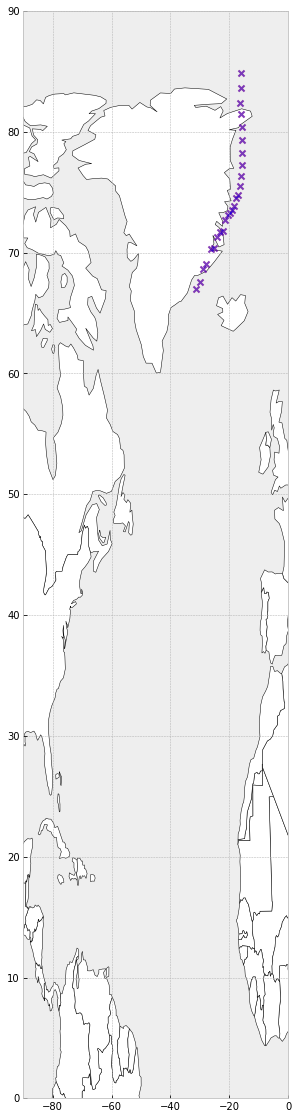

In [ ]:
ax = world.plot(color="white", edgecolor="black", figsize=(25,20))
_ = gdf_real.plot(ax=ax, c="r", marker="x", alpha=0.5)
_ = gdf_pred.plot(ax=ax, c="b", marker="x", alpha=0.5)
_ = plt.xlim(-90, 0)
_ = plt.ylim(0, 90)